## Séries temporais estacionárias: ARMA

Este notebook busca uma série temporal de um arquivo escolhido e faz algumas análises preliminares, bem como a aplicação dos modelos de previsão autorregressivos de média móvel.

Data da última atualização: 17/02/2025

#### Preliminares

In [1]:
# Carregamento das bibliotecas

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import datetime as dt

from statsmodels.tsa.seasonal import seasonal_decompose 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
# Ajuste das preferências gráficas

plt.style.use('fivethirtyeight')
plt.rcParams['lines.linewidth'] = 1.5
dark_style = {
    'figure.facecolor': '#FFFFFF',    # Cor da moldura
    'axes.facecolor': '#FFFFFF',      # Cor do fundo
    'savefig.facecolor':'#000000',
    'axes.grid': True,
    'axes.grid.which': 'both',
    'axes.spines.left': False,
    'axes.spines.right': False,
    'axes.spines.top': False,
    'axes.spines.bottom': True,
    'grid.color': '#888888',
    'grid.linewidth': '0.1',
    'text.color': '#000000',
    'axes.labelcolor': '#000000',
    'xtick.color': '#000000',
    'ytick.color': '#000000',
    'font.size': 12 }
plt.rcParams.update(dark_style)

from pylab import rcParams
rcParams['figure.figsize'] = (21,13)

#### Carregamento da Série Temporal

In [4]:
# Leitura do arquivo de dados

MinhaSerieTemporal = pd.read_csv('HistoricoVendasPadaria.csv', index_col = 0)

In [5]:
# Exibição do DataFrame

MinhaSerieTemporal

,Vendas
Data,
2024-02-04,52
2024-02-05,20
2024-02-06,34
2024-02-07,31
2024-02-08,36
...,...
2025-01-28,31
2025-01-29,31
2025-01-30,41


In [6]:
# Ajuste do índice para formato DateTime

MinhaSerieTemporal.index = pd.to_datetime(MinhaSerieTemporal.index)

<Axes: xlabel='Data'>

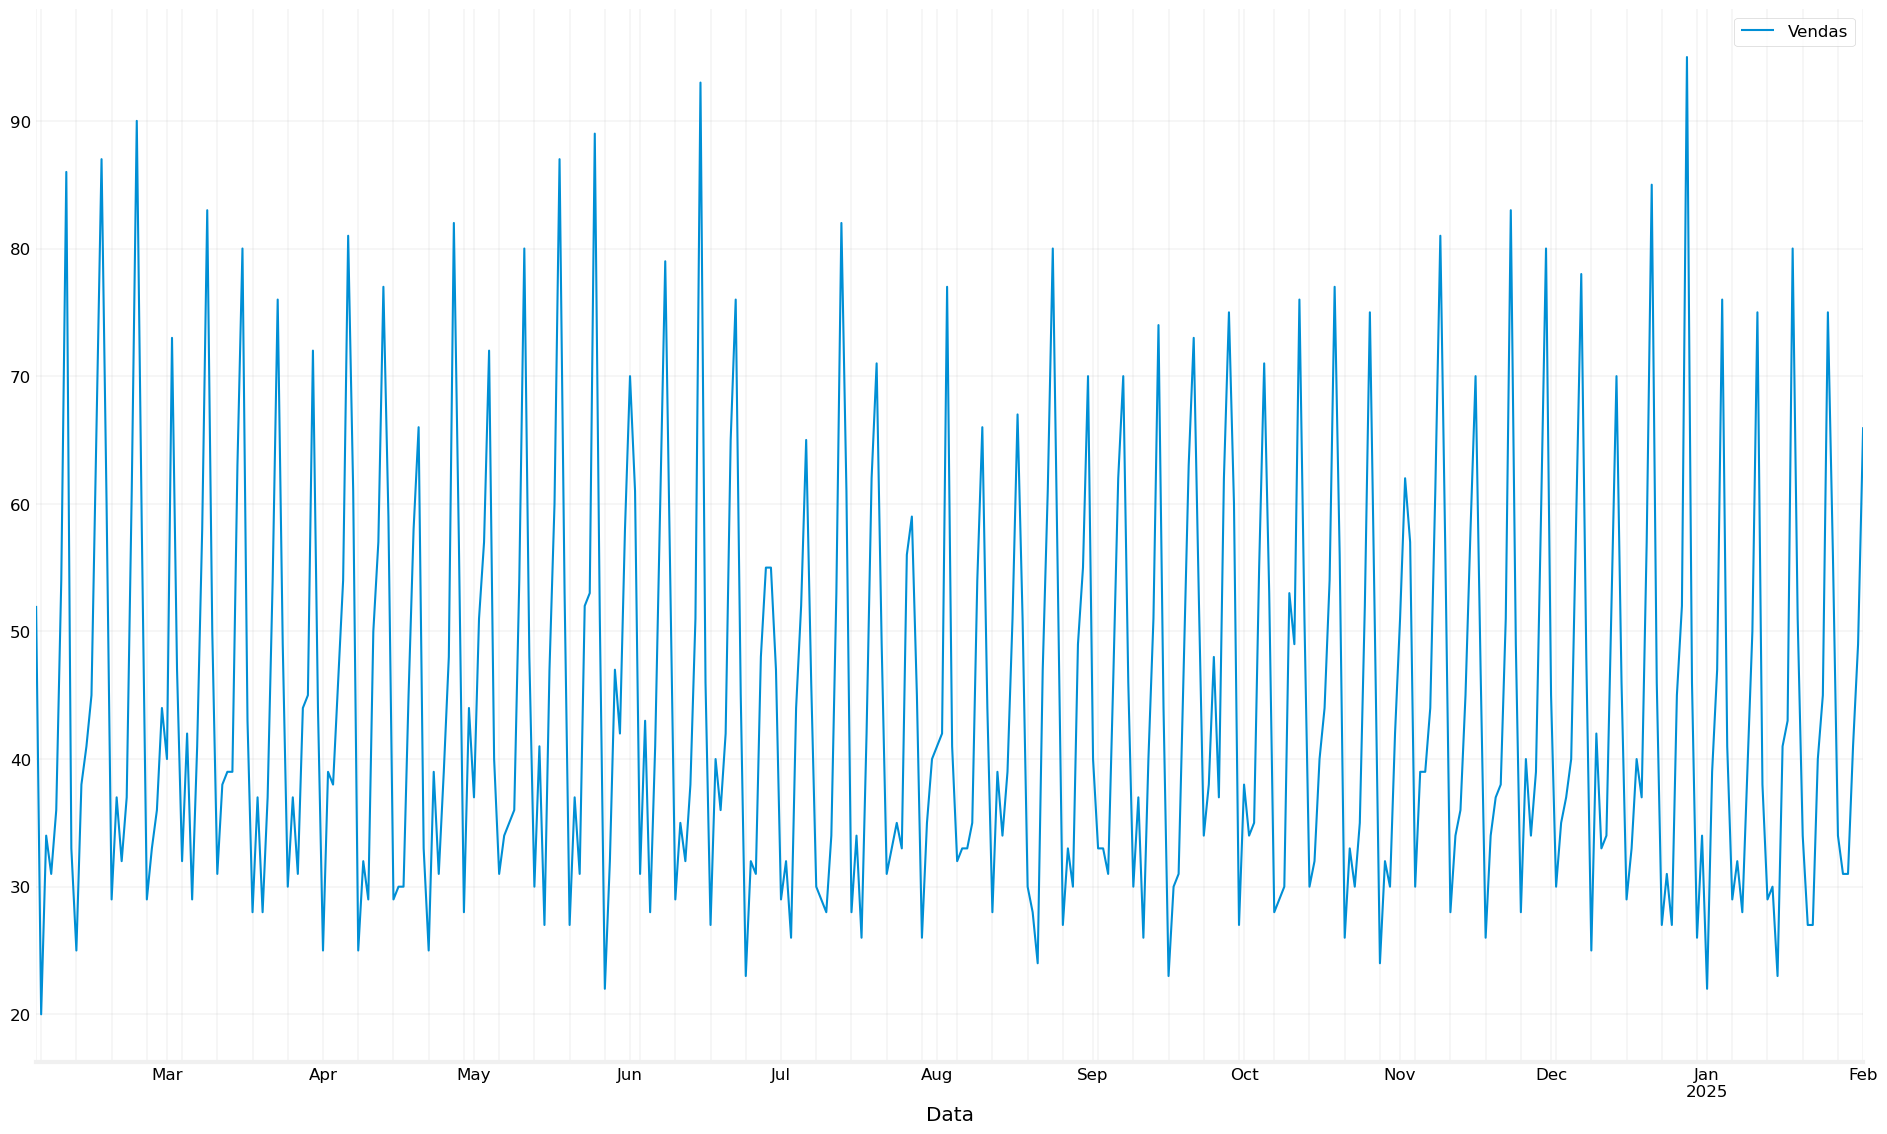

In [7]:
# Gráfico
MinhaSerieTemporal.plot()

#### Decomposição da Série

In [8]:
# Decomposição aditiva da série temporal

PeriodoSazonal = 7     # Sazonalidade semanal

Decomposicao = seasonal_decompose(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], model = "add", period = PeriodoSazonal)

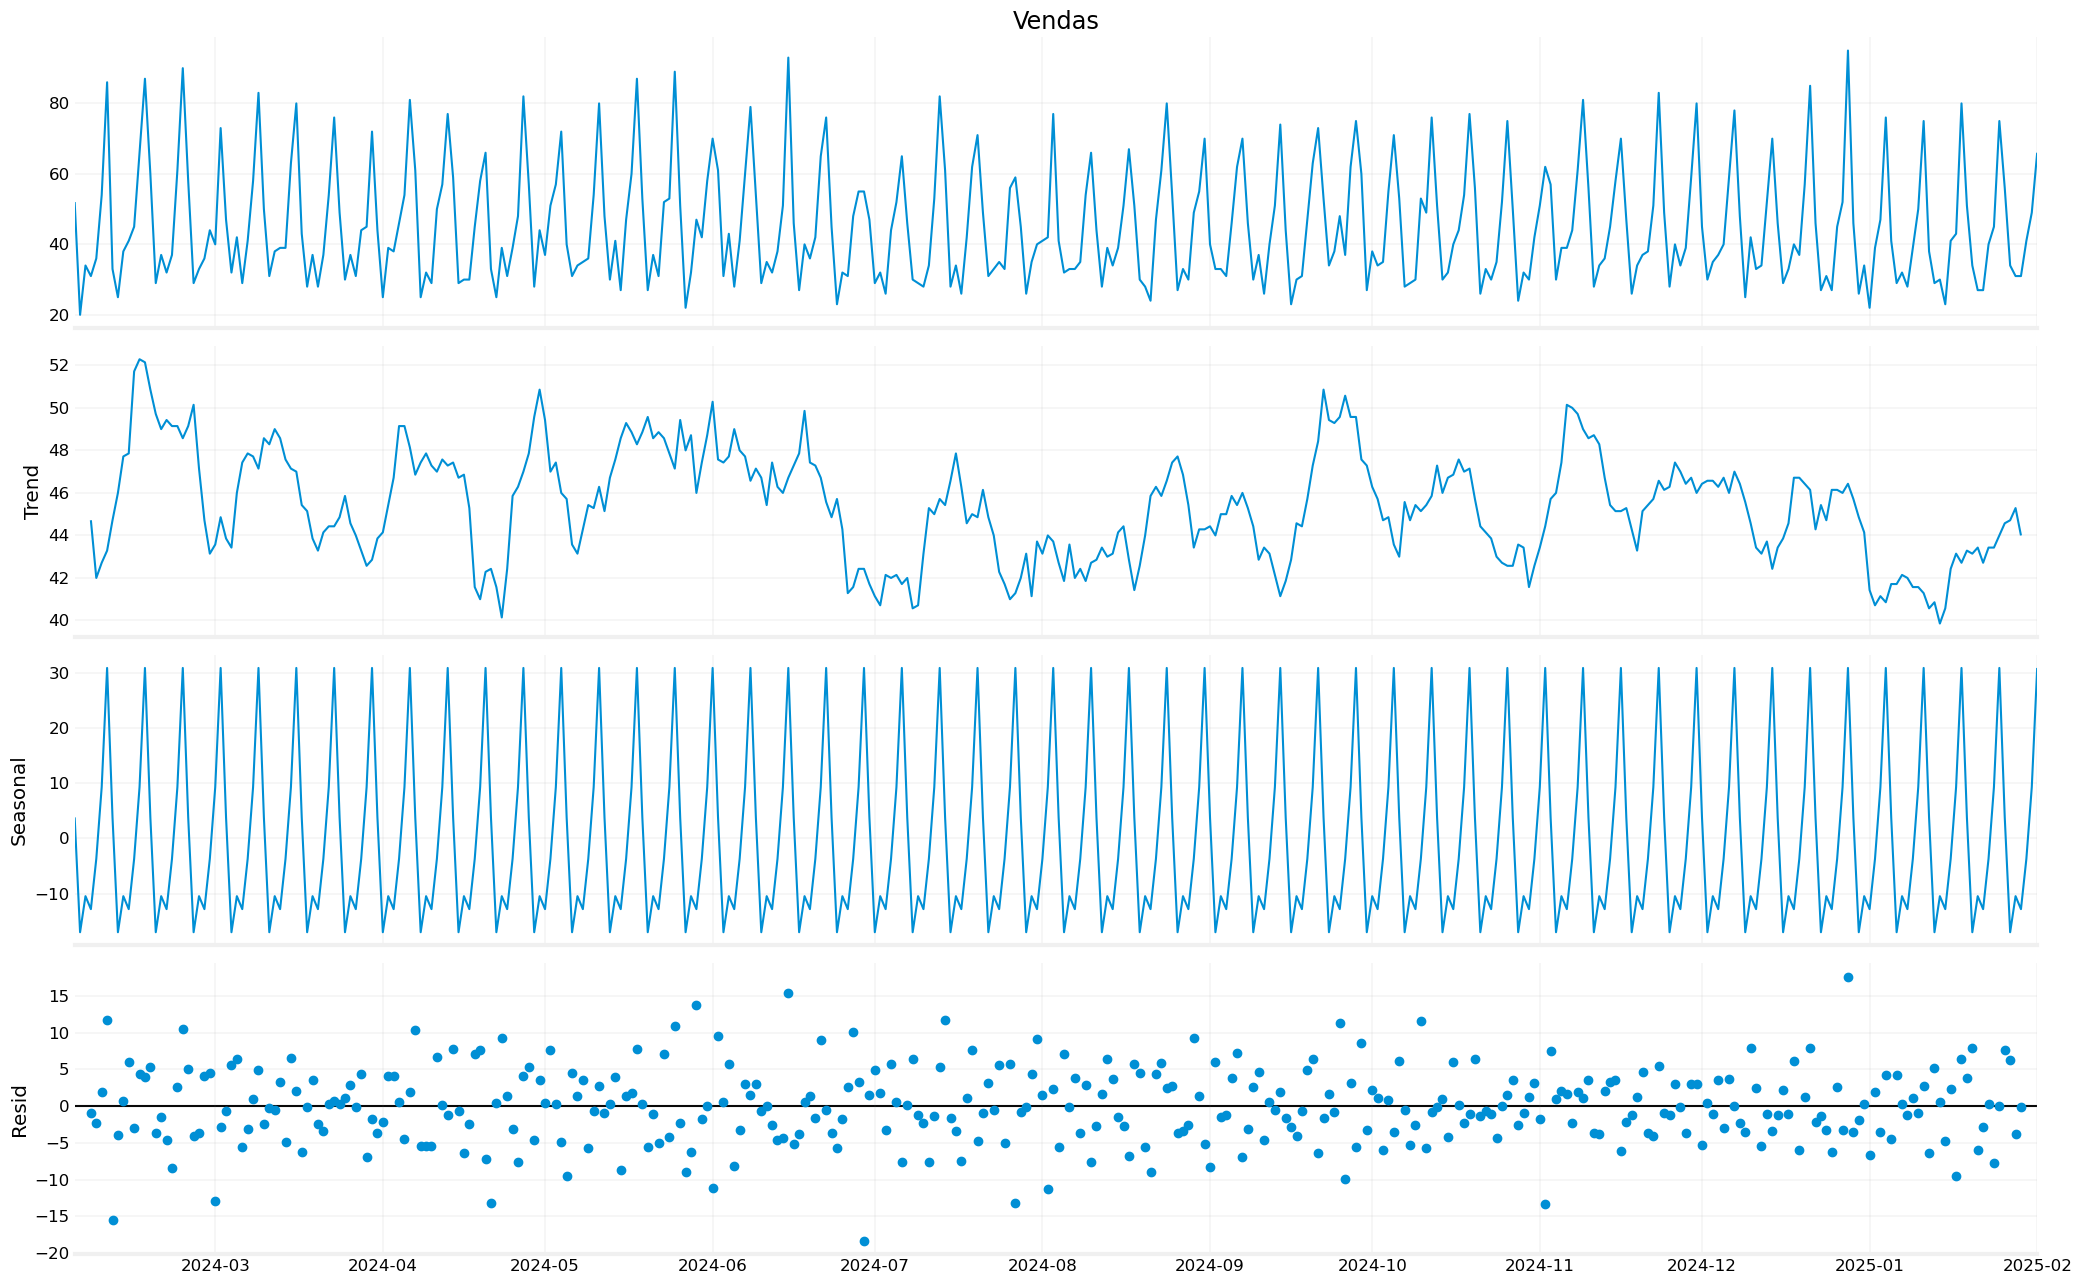

In [9]:
Decomposicao.plot();

#### Teste ADF

In [10]:
# Teste ADF para estacionariedade

ad_fuller_result = adfuller(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]])

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: -4.1514
p-value:          0.0795 %


In [11]:
# Teste ADF para estacionariedade para a série das diferenças finitas de ordem escolhida

OrdemDif = 1

ad_fuller_result = adfuller(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif))

print(f'Estatística ADF: {ad_fuller_result[0]:2.4f}')
print(f'p-value:         {ad_fuller_result[1]*100: 2.4f} %')

Estatística ADF: -9.9963
p-value:          0.0000 %


#### Funcão de autocorrelação

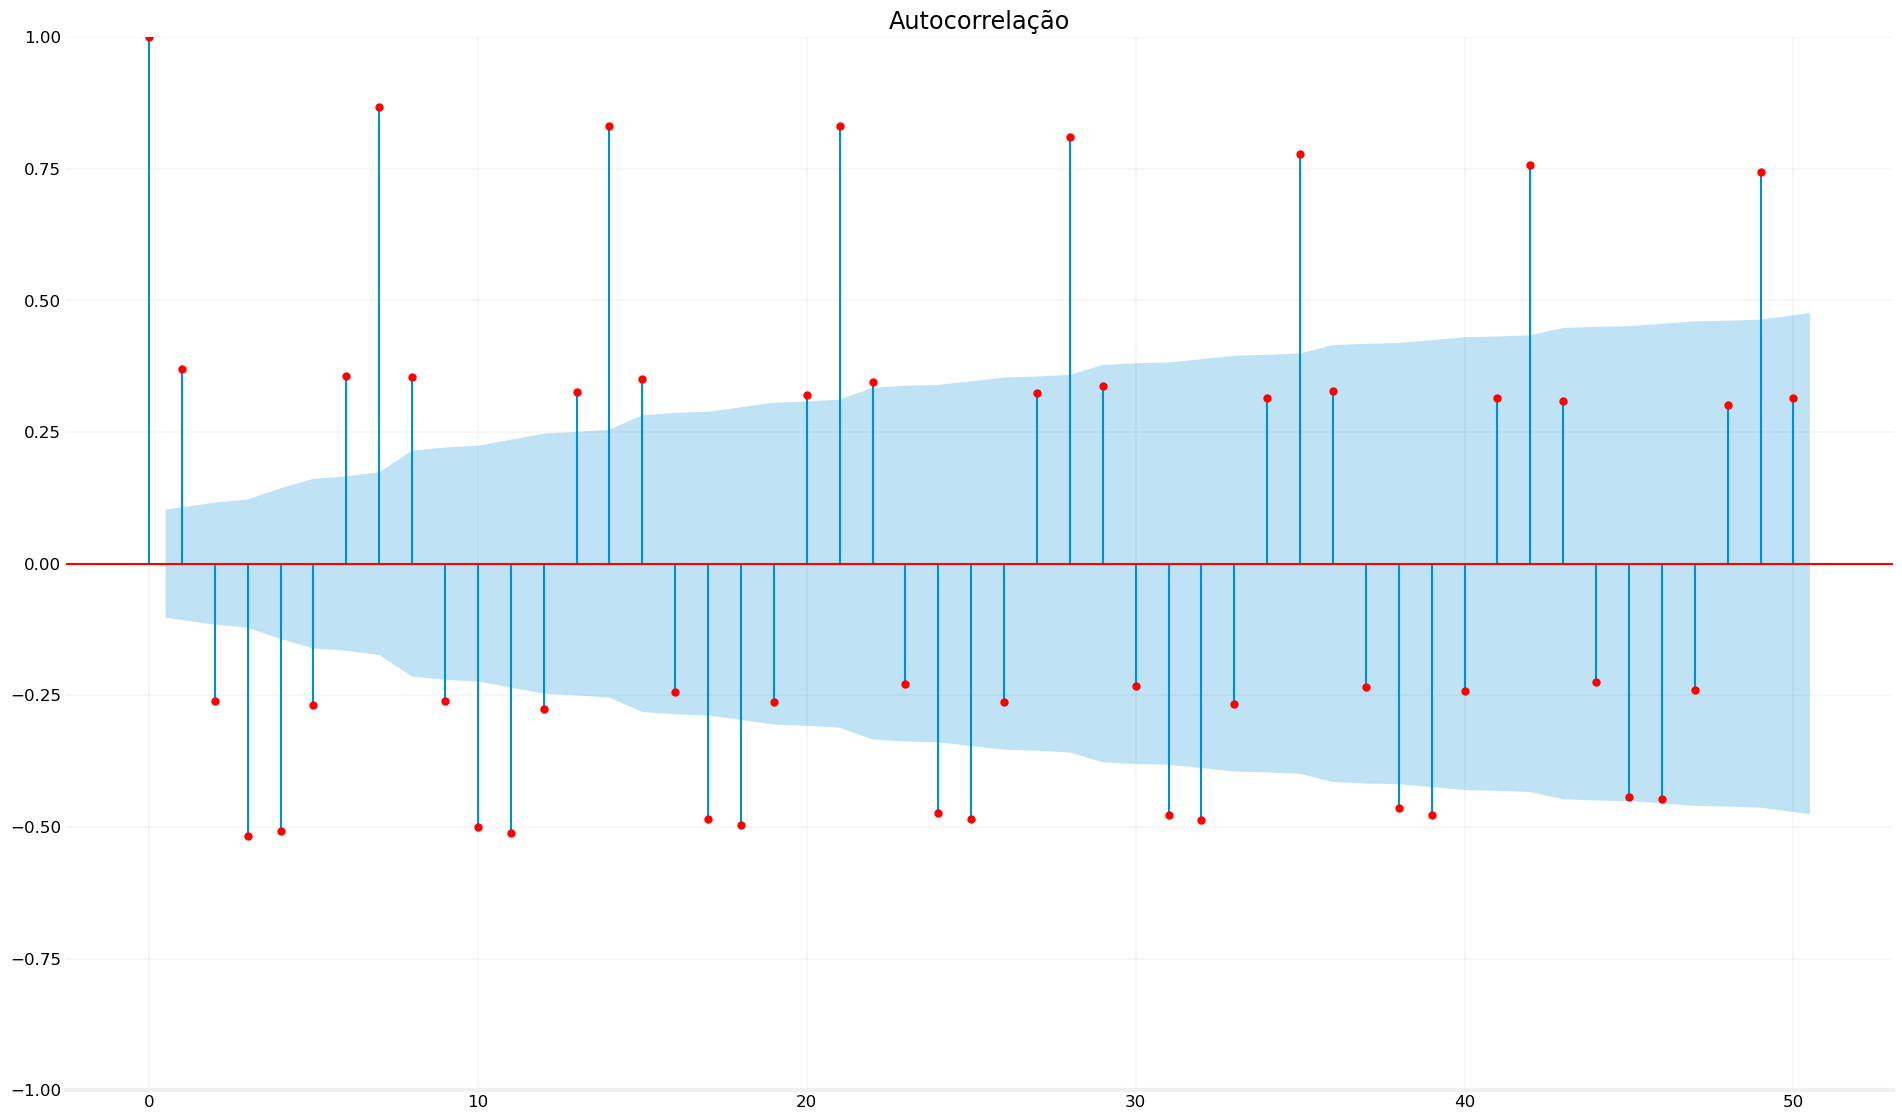

In [12]:
# Função de correlação para série temporal

plot_acf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=50, title = "Autocorrelação", color="red");

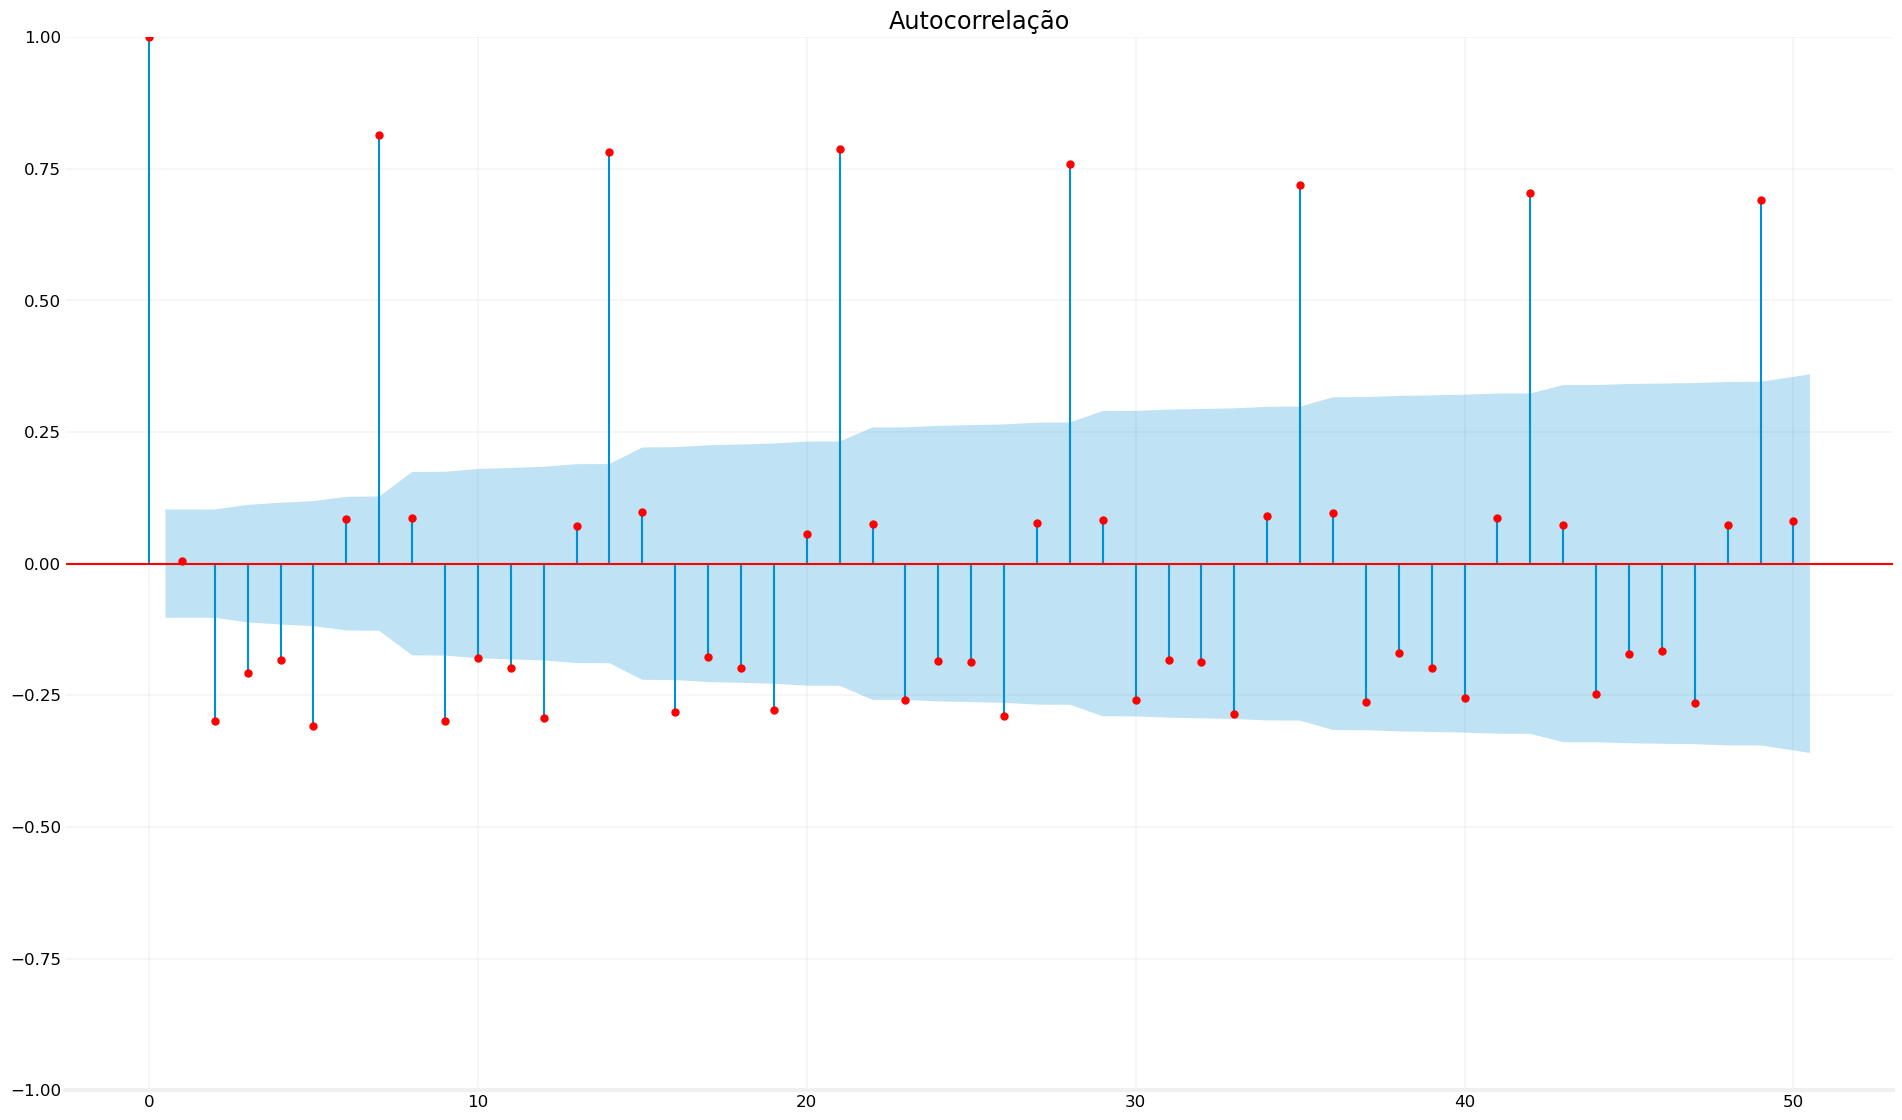

In [13]:
# Função de correlação para série das diferenças finitas da ordem escolhida acima

plot_acf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=50, title = "Autocorrelação", color="red");

#### Funcão de autocorrelação parcial

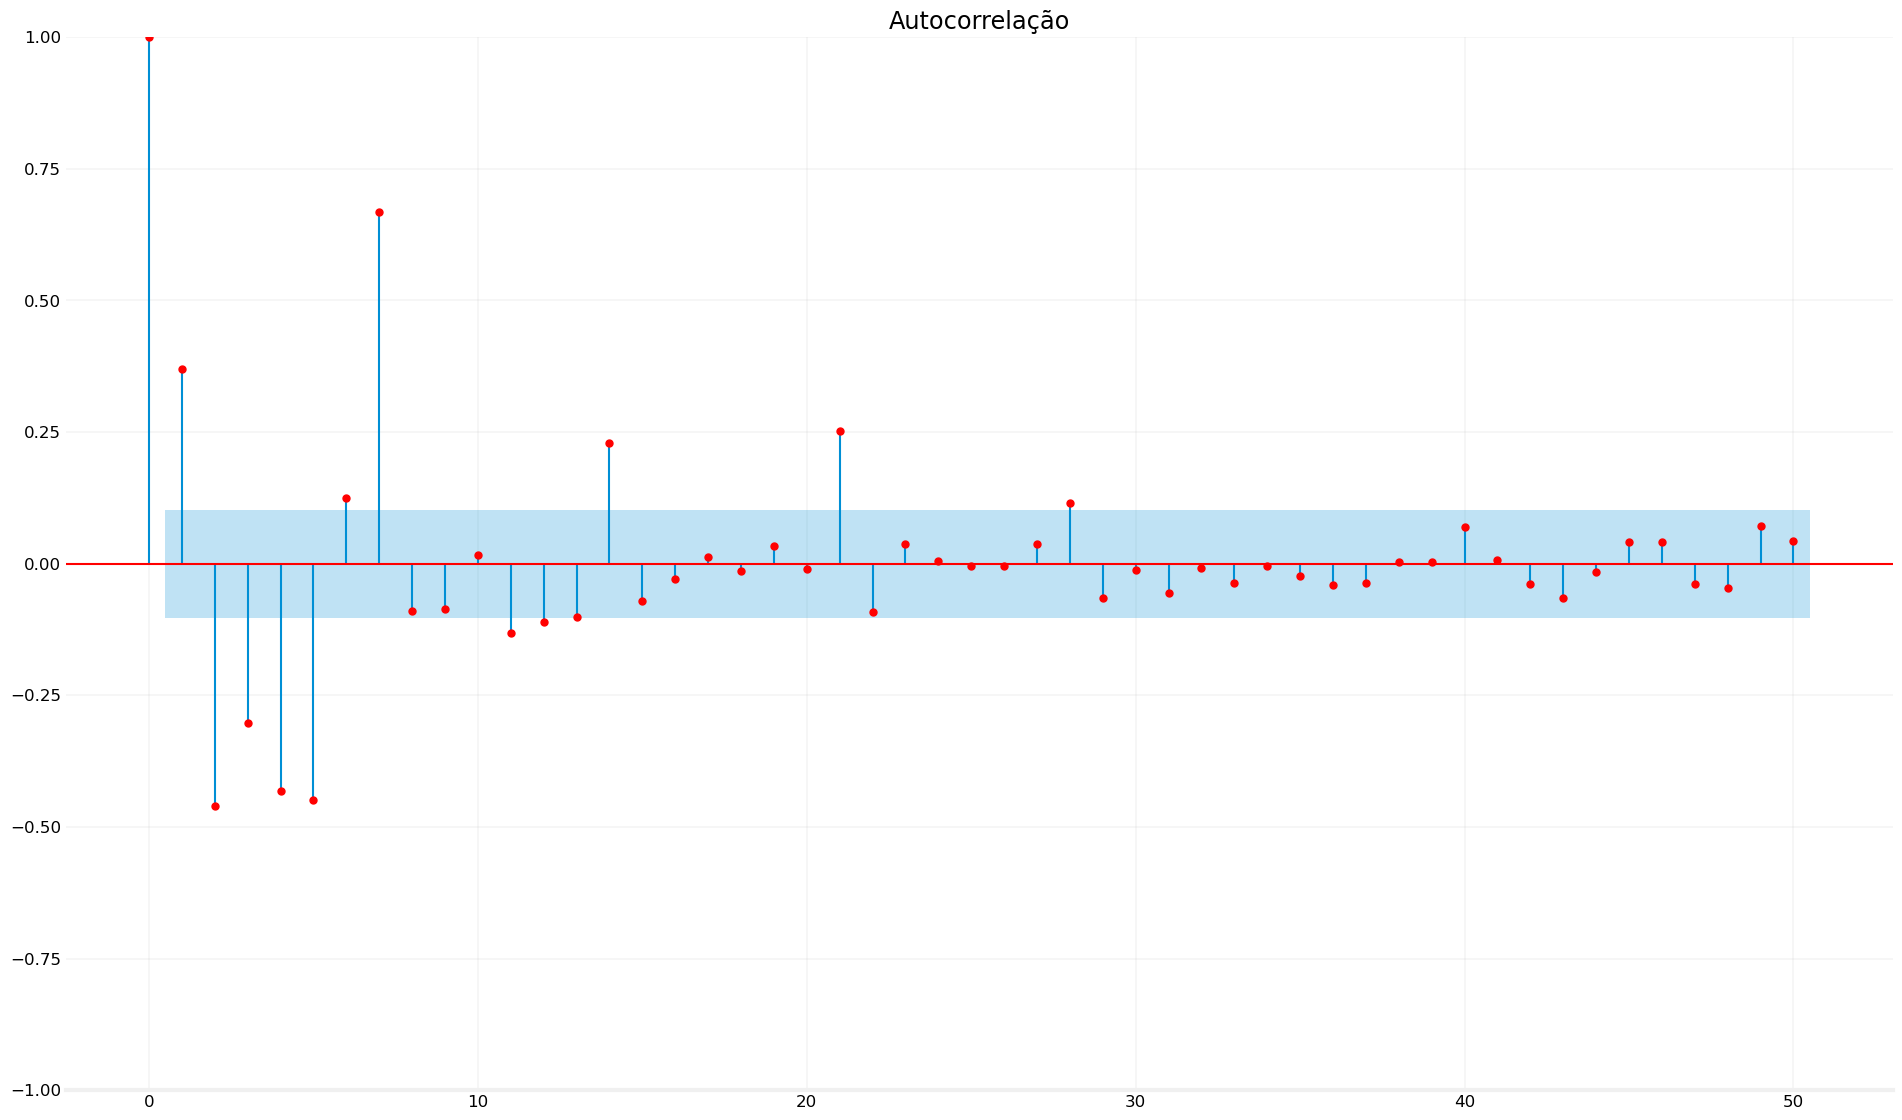

In [14]:
# Função de correlação parcial para série temporal

plot_pacf(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]],  lags=50, title = "Autocorrelação", color="red");

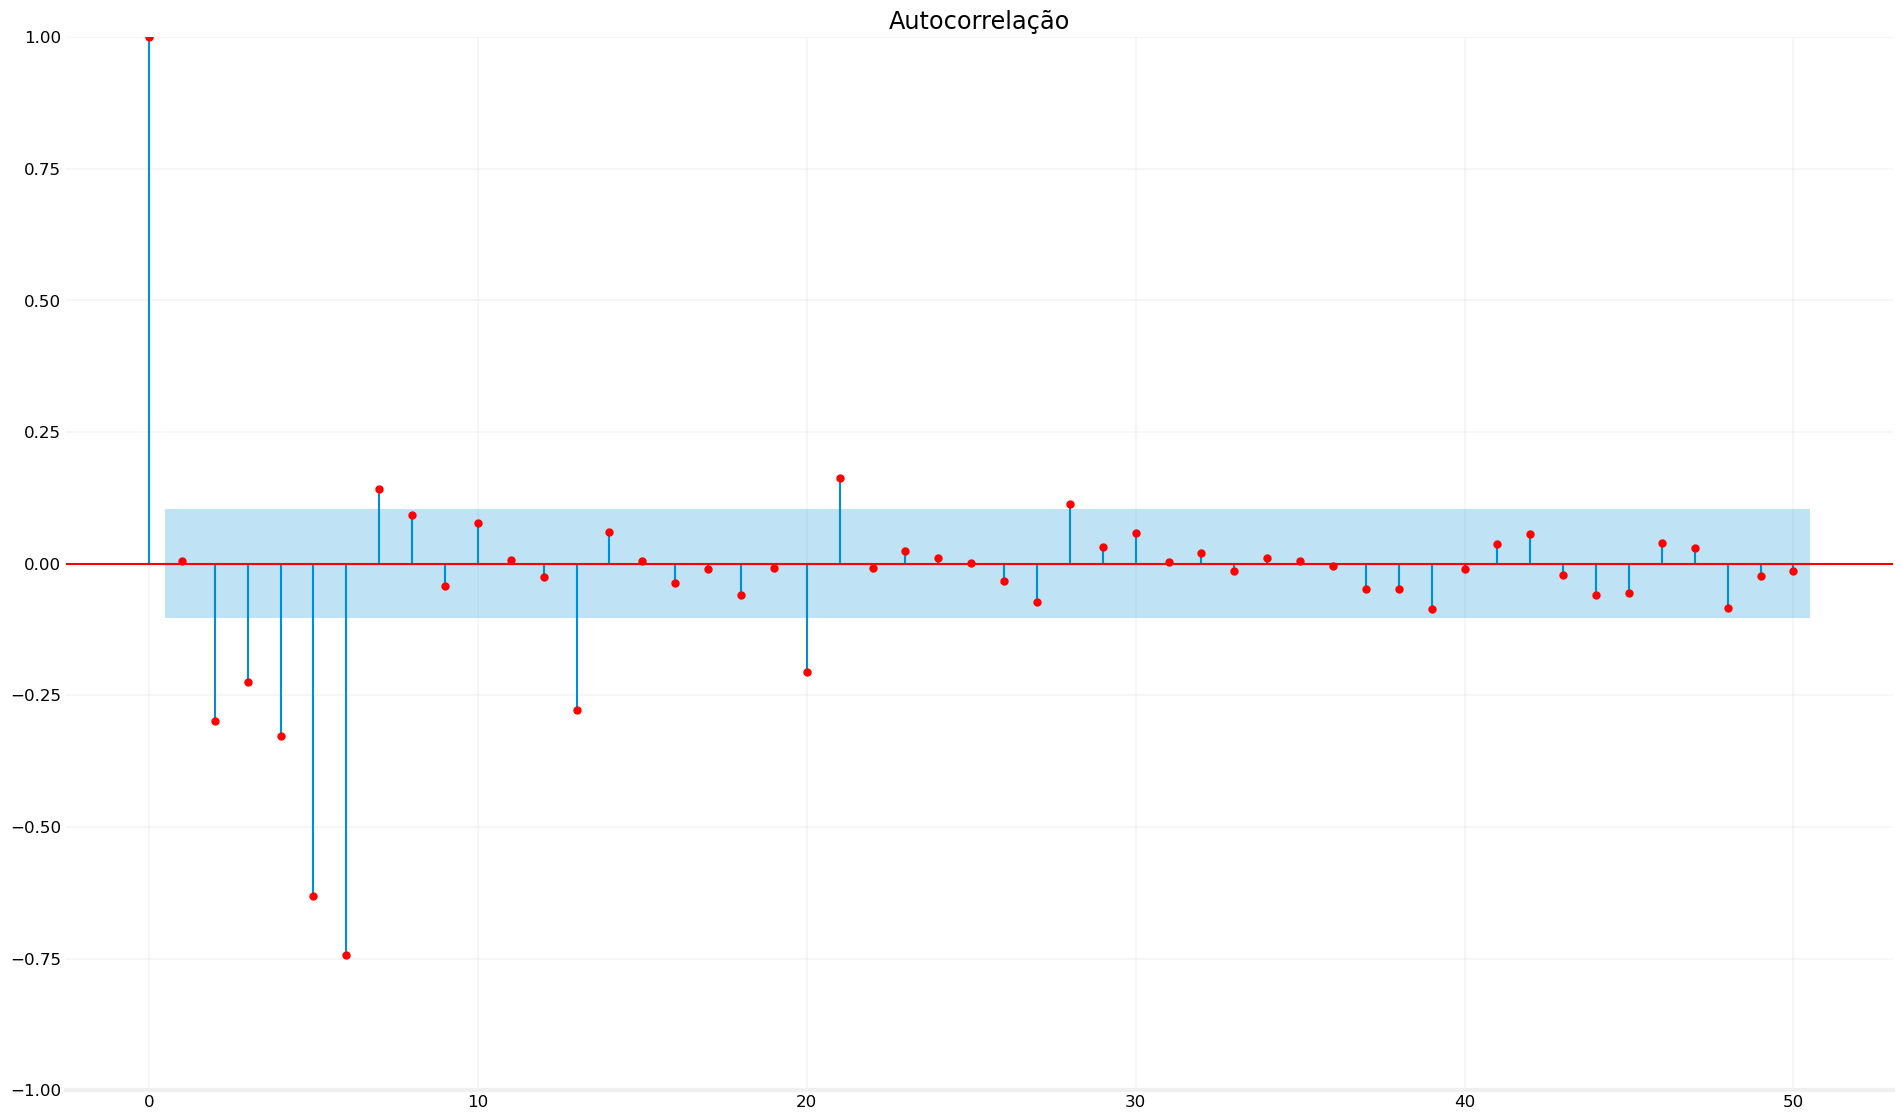

In [15]:
# Função de correlação parcial para série das diferenças finitas da ordem escolhida acima

plot_pacf(np.diff(MinhaSerieTemporal[MinhaSerieTemporal.columns[0]], n = OrdemDif),  lags=50, title = "Autocorrelação", color="red");

#### Separação das bases de treino e teste

In [16]:
# Definição da proporção de dados para compor a base de teste

PercentualTeste = 10

In [17]:
# Cálculo do tamanho do período de testes
PeriodoTeste = PercentualTeste * len(MinhaSerieTemporal) // 100

# Definição do DataFrame de treino
TreinoDF = pd.DataFrame(index = MinhaSerieTemporal[:-PeriodoTeste].index)
TreinoDF['Treino'] = MinhaSerieTemporal[:-PeriodoTeste][MinhaSerieTemporal.columns[0]]

# Definição do DataFrame de teste
TesteDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
TesteDF['Teste'] = MinhaSerieTemporal[-PeriodoTeste:][MinhaSerieTemporal.columns[0]]

<Axes: xlabel='Data'>

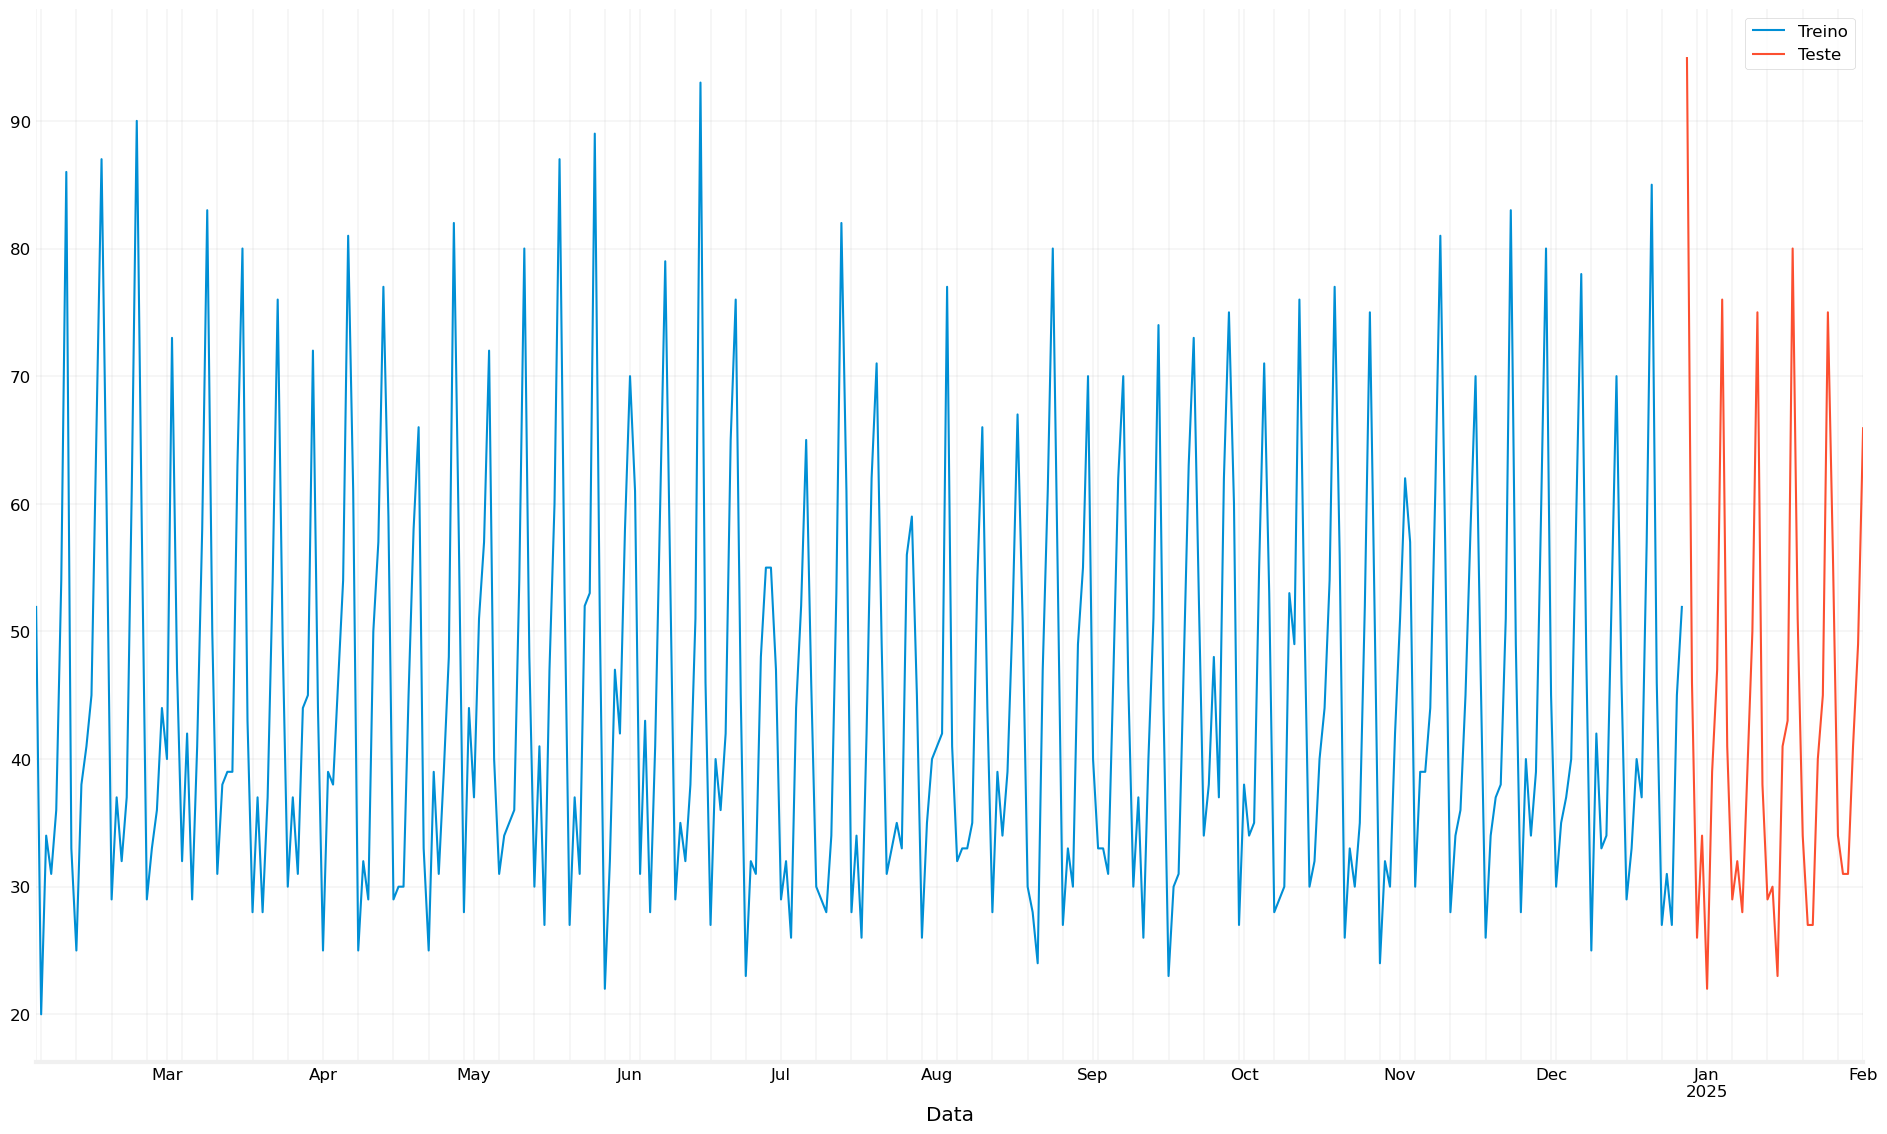

In [18]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([TreinoDF,TesteDF], axis = 1).plot()

#### Previsão pelo modelo ARMA

In [19]:
# Definição da ordem de autorregressividade

p = 7

# Definição da ordem da média móvel

q = 0

In [20]:
model = SARIMAX(TreinoDF, order=(p,0,q))
model_fit = model.fit(disp=False)

print(model_fit.summary())

C:\Users\gabri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\gabri\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                 Treino   No. Observations:                  328
Model:               SARIMAX(7, 0, 0)   Log Likelihood               -1132.824
Date:                Sun, 16 Mar 2025   AIC                           2281.648
Time:                        23:35:33   BIC                           2311.992
Sample:                    02-04-2024   HQIC                          2293.755
                         - 12-27-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1567      0.033      4.765      0.000       0.092       0.221
ar.L2         -0.0505      0.041     -1.229      0.219      -0.131       0.030
ar.L3         -0.0130      0.042     -0.306      0.7

In [21]:
PrevisoesSARIMAX = model_fit.get_prediction(len(TreinoDF), len(TreinoDF) + len(TesteDF) - 1).predicted_mean

In [22]:
# Montagem do DataFrame de previsão

PrevisoesDF  = pd.DataFrame(index = MinhaSerieTemporal[-PeriodoTeste:].index)
PrevisoesDF['Previsão'] = PrevisoesSARIMAX

<Axes: xlabel='Data'>

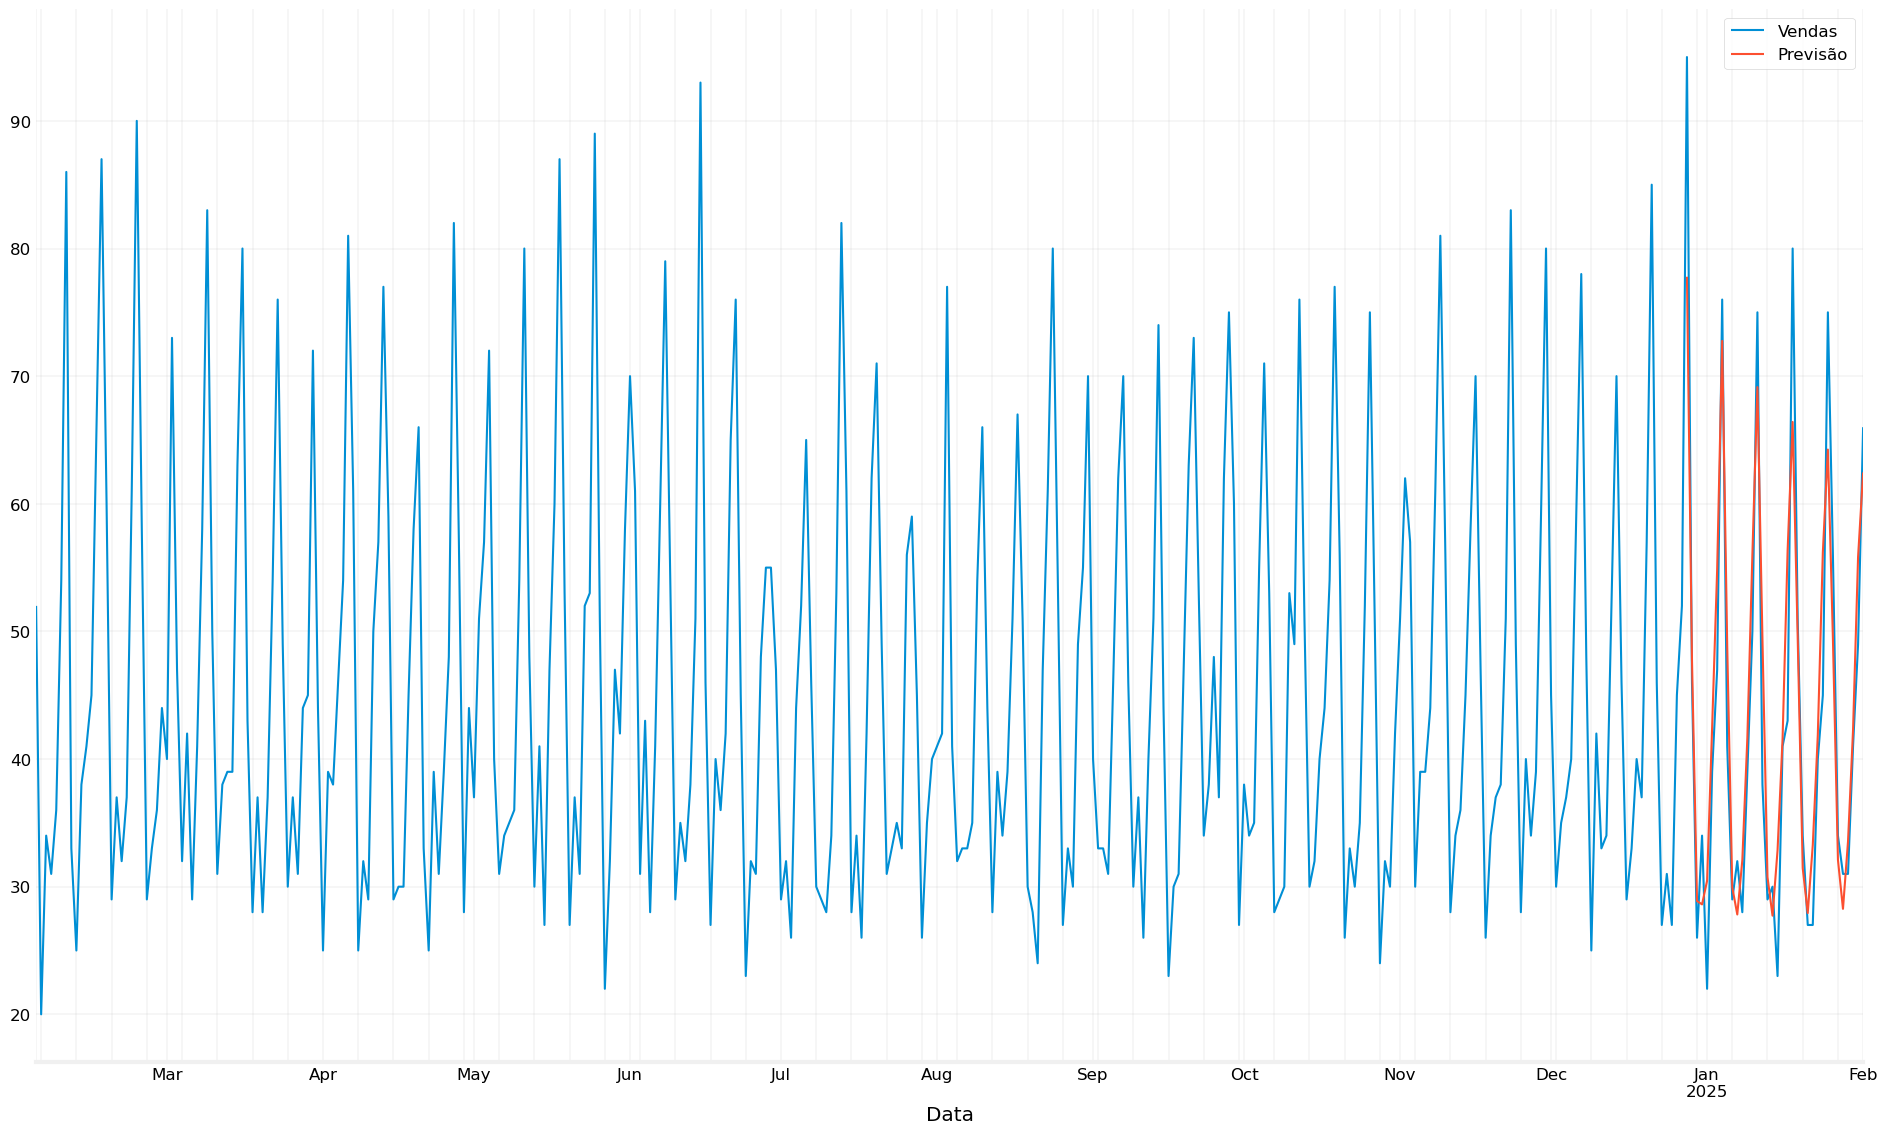

In [23]:
# Exibe a série temporal, com a separação da base de dados

pd.concat([MinhaSerieTemporal,PrevisoesDF], axis = 1).plot()

#### Medidas de erro

In [24]:
# Cáluclo do vetor de erros

Erros = PrevisoesDF['Previsão'].values - TesteDF['Teste'].values
Erros

array([-17.21259758,   1.75157794,   2.8764317 ,  -5.38652012,
         8.4616004 ,   3.46574382,   7.83007461,  -3.23992784,
         7.85236638,   0.95496358,  -4.17679315,   4.07084238,
         2.65504367,   6.01514182,  -5.86049208,  11.3938504 ,
         1.755111  ,  -2.27017059,   9.84437495,   0.62349447,
        13.33069975, -13.59023388,  -1.46093422,  -2.54478514,
         0.93398473,   6.26203576,   1.90238448,  11.19994086,
       -10.75228305,  -6.56987766,  -1.89594515,  -2.73653465,
         2.54181111,   1.26922468,   6.84774426,  -3.54288666])

In [25]:
# Cálculo do erro médio
ErroMedio = Erros.mean()

In [26]:
# Cálculo do erro absoluto médio
MAE = np.abs(Erros).mean()

In [27]:
# Cálculo da raiz do erro quadrático médio
RMSE = np.sqrt((Erros**2).mean())

In [28]:
# Cálculo dos erros relativos
ErrosRelativos = Erros / TesteDF['Teste'].values
ErrosRelativos

array([-0.18118524,  0.03807778,  0.11063199, -0.15842706,  0.3846182 ,
        0.08886523,  0.16659733, -0.04263063,  0.19152113,  0.03292978,
       -0.13052479,  0.14538723,  0.06807804,  0.12030284, -0.07813989,
        0.29983817,  0.06052107, -0.07567235,  0.4280163 ,  0.01520718,
        0.31001627, -0.16987792, -0.02864577, -0.07484662,  0.03459203,
        0.23192725,  0.04755961,  0.24888757, -0.14336377, -0.11731924,
       -0.05576309, -0.08827531,  0.08199391,  0.0309567 ,  0.13974988,
       -0.0536801 ])

In [29]:
# Cálculo do erro percentual absoluto médio
MAPE = np.abs(ErrosRelativos).mean()

In [30]:
print(f'Medidas de erro de previsão')
print()
print(f'Modelo de previsão: ARMA({p},{q})')
print()
print(f'Erro médio: {ErroMedio: 2.1f}')
print(f'MAE:        {MAE: 2.1f}')
print(f'RMSE:       {RMSE: 2.1f}')
print(f'MAPE:       {MAPE*100: 2.1f} %')

Medidas de erro de previsão

Modelo de previsão: ARMA(7,0)

Erro médio:  0.9
MAE:         5.4
RMSE:        6.8
MAPE:        13.0 %
